# van der Pol方程式
$$
\left\{
\begin{aligned}
\dot{v} &=z,\\
\dot{z} &=\varepsilon (1-v^2)z - v
\end{aligned}
\right.
$$

van der Polが描いた相図を数値計算で再現

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set('poster', 'whitegrid', 'dark', rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

ベクトル場の定義

In [2]:
def vdp(t, x, eps):
    return [x[1], eps * (1 - x[0]**2)*x[1] - x[0]]

区間$[0, 150]$を15000点に分ける

In [3]:
t0 = 0.0
t1 = 150.0
N = 15000
tt = np.linspace(t0, t1, N)

## $\varepsilon = 0.1$

In [4]:
eps = 0.1
x0 = [-4.0, 4.0]
x1 = [0.1,0.1]
x2 = [2.0, 0.0]
s0 = solve_ivp(vdp, [t0, t1], x0, args=([eps]), t_eval=tt)
s1 = solve_ivp(vdp, [t0, t1], x1, args=([eps]), t_eval=tt)
s2 = solve_ivp(vdp, [t0, t1], x2, args=([eps]), t_eval=tt)

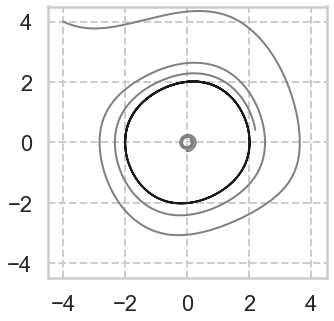

In [5]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
# ax.set_xlabel("$v$")
# ax.set_ylabel("$z$")
ax.set_xlim(-4.5,4.5)
ax.set_ylim(-4.5,4.5)
ax.set_xticks([-4,-2,0,2,4])
ax.set_yticks([-4,-2,0,2,4])
ax.plot(s0.y[0][:N//10], s0.y[1][:N//10], '-',color='grey',linewidth=2)
ax.plot(s1.y[0][:N//10], s1.y[1][:N//10], '-',color='grey',linewidth=2)
ax.plot(s2.y[0][-N//10:], s2.y[1][-N//10:], '-k',linewidth=2.0)
# plt.savefig("vdP_e01vz.pdf", bbox_inches='tight')

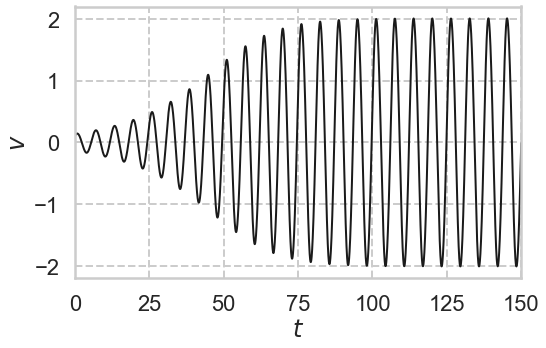

In [6]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set_xlabel("$t$")
ax.set_ylabel("$v$")
ax.set_xlim(0, 150)
ax.set_ylim(-2.2,2.2)
ax.plot(tt, s1.y[0], '-k')
# plt.savefig("vdP_e01.pdf", bbox_inches='tight')

## $\varepsilon = 1.0$

In [7]:
eps = 1.0
x0 = [-2.0, 3.0]
x1 = [0.1,0.0]
x2 = [2.0, 0.0]
s10 = solve_ivp(vdp, [t0, t1], x0, args=([eps]), t_eval=tt)
s11 = solve_ivp(vdp, [t0, t1], x1, args=([eps]), t_eval=tt)
s12 = solve_ivp(vdp, [t0, t1], x2, args=([eps]), t_eval=tt)

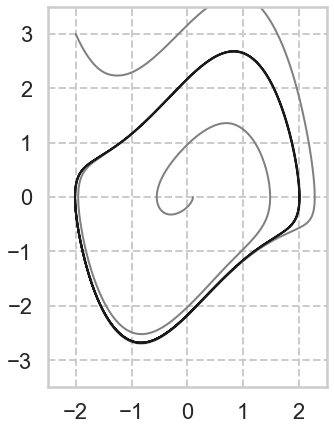

In [8]:
fig = plt.figure(figsize=(5,7))
ax = fig.add_subplot(111)
# ax.set_xlabel("$v$")
# ax.set_ylabel("$z$")
ax.set_xlim(-2.5,2.5)
ax.set_ylim(-3.5,3.5)
ax.set_xticks([-2,-1,0,1,2])
ax.plot(s10.y[0][:N//10], s10.y[1][:N//10], '-k',color='grey')
ax.plot(s11.y[0][:N//10], s11.y[1][:N//10], '-k',color='grey')
ax.plot(s12.y[0][-N//10:], s12.y[1][-N//10:], '-k',linewidth=2.0)
# plt.savefig("vdP_e10vz.pdf", bbox_inches='tight')

## $\varepsilon = 10.0$

区間$[0,150]$上に30000点とる

In [9]:
eps = 10.0
t1 = 150.0
N = 30000
tt = np.linspace(t0, t1, N)
x0 = [-2.0, 15.0]
x2 = [2.0, 0.0]
s20 = solve_ivp(vdp, [t0, t1], x0, args=([eps]), t_eval=tt)
s22 = solve_ivp(vdp, [t0, t1], x2, args=([eps]), t_eval=tt)

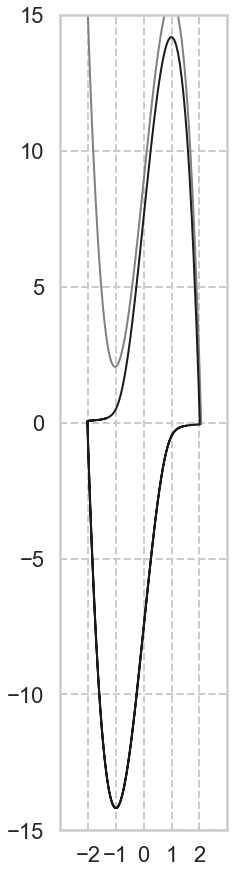

In [10]:
fig = plt.figure(figsize=(3,15))
ax = fig.add_subplot(111)
# ax.set_xlabel("$v$")
# ax.set_ylabel("$z$")
ax.set_xlim(-3,3)
ax.set_ylim(-15,15)
ax.set_xticks([-2,-1,0,1,2])
ax.plot(s20.y[0][:N//10], s20.y[1][:N//10], '-k',color='grey')
ax.plot(s22.y[0][-N//5:], s22.y[1][-N//5:], '-k',linewidth=2.0)
# plt.savefig("vdP_e10vz.pdf", bbox_inches='tight')

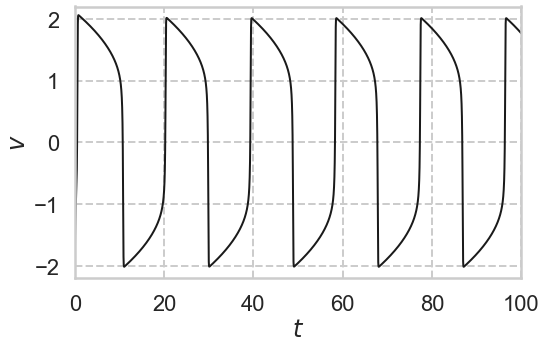

In [11]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set_xlabel("$t$")
ax.set_ylabel("$v$")
ax.set_xlim(0, 100)
ax.set_ylim(-2.2,2.2)
ax.plot(tt, s20.y[0], '-k')
# plt.savefig("vdP_e10.pdf", bbox_inches='tight')